+------------------------+------------------+--------------+--------------+------------------+
| Distance to Goal(feet) | Total Goal Angle | x2 (Degrees) | x1 (Degrees) | (x2*2)/150 * 100 |
+------------------------+------------------+--------------+--------------+------------------+
|           3            |      151.93      |    12.53     |    63.43     |      16.71       |
|           6            |      126.87      |    18.43     |     45.0     |      24.58       |
|           9            |      106.26      |    19.44     |    33.69     |      25.92       |
|           12           |       90.0       |    18.43     |    26.57     |      24.58       |
|           15           |      77.32       |    16.86     |     21.8     |      22.48       |
|           18           |      67.38       |    15.26     |    18.43     |      20.34       |
|           21           |      59.49       |     13.8     |    15.95     |       18.4       |
|           24           |      53.13       |    1

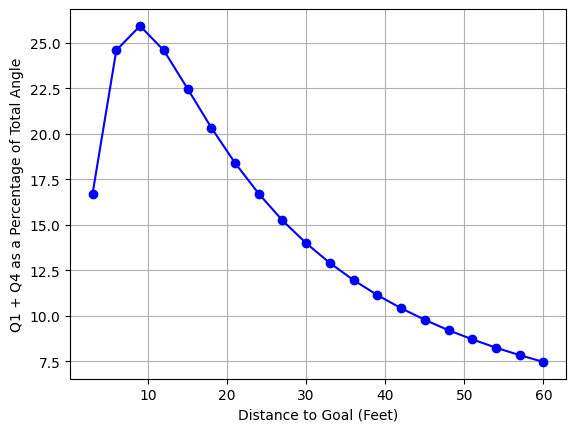

In [1]:
import math
from sympy import symbols, Eq, solve
import pandas as pd
from prettytable import PrettyTable
import matplotlib.pyplot as plt
import random



distances = range(3, 63, 3)
#distances = (3,6,9,12,15,36,42,48,54,60)
results = []

def calculate_goal_angle(distance, goal_width=24):
    half_angle = math.atan((goal_width / 2) / distance)
    full_angle = 2 * half_angle
    return math.degrees(full_angle)

for d in distances:
  angle = calculate_goal_angle(d)

  quart1_angle = math.atan(6/d)
  quart2_angle = (angle/2)-math.degrees(quart1_angle)
  target_size = ((quart2_angle*2)/(150) )*100
  results.append({
    "angle": angle,
    "distance": d,
    "First 1/4": quart2_angle,
    "Second 1/4": math.degrees(quart1_angle),
    "Third 1/4": math.degrees(quart1_angle),
    "Fourth 1/4": quart2_angle,
    "Target Size": target_size
})


# Create a table object
table = PrettyTable()

# Add column headers
table.field_names = ["Distance to Goal(feet)", "Total Goal Angle", "x2 (Degrees)", "x1 (Degrees)", "(x2*2)/150 * 100"]

# Add rows
listtarget = []
for result in results:
    angle = round(result["angle"],2)
    distance = result["distance"]
    split1 = round(result["First 1/4"],2)
    split2 = round(result["Second 1/4"],2)
    target_size = round(result["Target Size"],2)
    listtarget.append(target_size)
  # Append the row data (with 5 columns)
    table.add_row([distance, angle, split1, split2, target_size])

print(table)
print()
print("Largest Percentage to aim at is",max(listtarget),"%")

plt.plot(distances, listtarget, color='blue', marker = 'o')

plt.xlabel('Distance to Goal (Feet)')
plt.ylabel('Q1 + Q4 as a Percentage of Total Angle')
plt.grid(True)
plt.savefig("graph2d.png")
plt.show()